In [ ]:
#!pip install sentinelhub

# Commercial data

For use of commercial data you have to first provide your sentinel-hub account client id and client secret.

In [2]:
from sentinelhub import SHConfig
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
from odc_sh import SentinelHubCommercialData
from odc_sh import Providers, AirbusConstellation, ThumbnailType, WorldViewKernel, WorldViewSensor, SkySatType, SkySatBundle, ScopeType, ScopeBundle
import pandas as pd

config = SHConfig()
config.sh_client_id = 'f686f1fa-c2ae-4aa0-b677-9b34d4dfb668'
config.sh_client_secret = 'z/-0ubV?,t<HWYEwgYCO.[HQkoBVvI92#k%5Z)AB'

shcd = SentinelHubCommercialData(config)

## INFO

Every response that have method "print_info()", also have a raw data in response object.
Example:

In [ ]:
q = shcd.quotas()
q.print_info()

# response data
print(q.data)

## Getting quotas

In [3]:
# Optional 1: To get single quota add id as parameter
#
#     shcd.quotas("asd124-12ddas...")
#

q = shcd.quotas()
q.print_info()


  idx  collectionId       quotaSqkm    quotaUsed
-----  ---------------  -----------  -----------
    0  AIRBUS_SPOT             1000        22
    1  AIRBUS_PLEIADES          100         7.25


# Simple search

Setting date and time

In [5]:
time_from = "2017-05-25T00:00:00Z"
time_to = "2018-10-25T23:59:59Z"

Setting search area

In [6]:
# Option 1: Set bounds as bbox
bounds = [
  12.742243,
  42.05043,
  12.746302,
  42.053218
]

# Option 2: Set bounds as Polygon
bounds = {
  "type": "Polygon",
  "coordinates": [
   [
    [
     12.500395,
     41.931337
    ],
    [
     12.507856,
     41.931018
    ],
    [
     12.507513,
     41.927825
    ],
    [
     12.50048,
     41.928719
    ],
    [
     12.500395,
     41.931337
    ]
   ]
  ]
 }

## Choose one of the providers below

### 1. AIRBUS Pleiades & SPOT

In [15]:

# Option 1: AIRBUS Pleiades & SPOT
# Optional parameters: 
#    - maxCloudCoverage (Values: 0-100 | 100 as default)
#    - maxSnowCoverage (Vaules: 0-90 | 90 as default)
#    - maxIncidenceAngle (Values: 0-90 | 90 as default)
#    - processingLevel (Values: "Sensor","Album" | "Sensor","Album" as default)
#
#  example: shcd.search_airbus(AirbusConstellation, Bounds, Time_From, Time_To, *Optional parameters*)

res = shcd.search_airbus(AirbusConstellation.SPOT, bounds, time_from, time_to, maxCloudCoverage=90, maxSnowCoverage=50)

# Optional parameters: 
#    - props
#
# example: res.print_info(props=["id", "acquisitionDate", "resolution", "cloudCover"])
res.print_info()

# Getting ids
item_ids = res.get_ids()



  idx  id                                    acquisitionDate         resolution    cloudCover    incidenceAngle
-----  ------------------------------------  --------------------  ------------  ------------  ----------------
    0  be54c404-6111-4cac-844b-56ee1edf0a27  2017-08-05T09:30:52Z           1.5       0                 10.9392
    1  761004d2-e0f0-4b08-bb57-07bddc522004  2017-08-05T09:30:52Z           1.5       0                 10.9392
    2  29564858-c19b-4eca-b6ff-e001723106a3  2017-08-06T12:30:50Z           1.5       0                 20.7767
    3  5dfda8a2-1357-4868-9f46-dda50ef52d52  2017-08-07T09:16:11Z           1.5       0                 32.4359
    4  f93a332d-91a8-4e51-a1b5-cf653b82cf2f  2017-08-07T10:53:24Z           1.5       0                 32.4359
    5  f460e773-04a7-48bb-87b3-b7210b649c10  2017-08-08T09:10:35Z           1.5       0                 20.7767
    6  8793ad6e-b667-48db-a318-a41db4c771e2  2018-03-27T11:10:50Z           1.5      14.9               

### 2. Planet SCOPE

In [ ]:

# Option 2: Planet SCOPE
# Optional parameters: 
#    - maxCloudCoverage (Values: 0-100 | 100 as default)
#
#  example: shcd.search_airbus(ScopeType, ScopeBundle, Bounds, Time_From, Time_To, *Optional parameters*)

res = shcd.search_planet(ScopeType.PSScene, ScopeBundle.ANALYTIC_UDM2, bounds, time_from, time_to, maxCloudCoverage=90)

# Optional parameters: 
#    - props
#
# example: res.print_info(props=["cloud_cover", "snow_ice_percent", "acquired", "pixel_resolution"])
res.print_info()

# Getting ids
item_ids = res.get_ids()


### 3. Planet SkySat

In [ ]:

# Option 3: Planet SkySat
#
#  example: shcd.search_airbus(ScopeType, ScopeBundle, Bounds, Time_From, Time_To, planetApiKey=<your_planey_api_key>)

res = shcd.search_planet(SkySatType.SkySatCollect, SkySatBundle.PANCHROMATIC, bounds, time_from, time_to, planetApiKey="")

# Optional parameters: 
#    - props
#
# example: res.print_info(props=["cloud_cover", "snow_ice_percent", "acquired", "pixel_resolution"])
res.print_info()

# Getting ids
item_ids = res.get_ids()


### 4. WorldView

In [ ]:

# Option 4: WorldView MAXAR
# Optional parameters:
#    - maxCloudCoverage (Values: 0-100 | 100 as default)
#    - minOffNadir (Values: 0-45 | 0 as default)
#    - maxOffNadir (Values: 0-45 | 45 as default)
#    - minSunElevation (Values: 0-90 | o as default)
#    - maxSunElevation (Values: 0-90 | 90 as default)
#    - sensor (Values: WorldViewSensor | Any as default)
#
#  example: shcd.search_airbus(WorldViewKernel, ScopeBundle, Bounds, Time_From, Time_To, *Optional parameters*)
#

res = shcd.search_worldview(WorldViewKernel.MTF, bounds, time_from, time_to, sensor=WorldViewSensor.WV01.value)

# Optional parameters: 
#    - props
#
# example: res.print_info(props=["catalogId", "sensor", "maxSunAzimuth", "acquisitionDateStart"])
res.print_info()

# Getting ids
item_ids = res.get_ids()


## Error checking

In [ ]:
if not len(res.data.features):
    print("No data found in request above.")

## Thumbnail

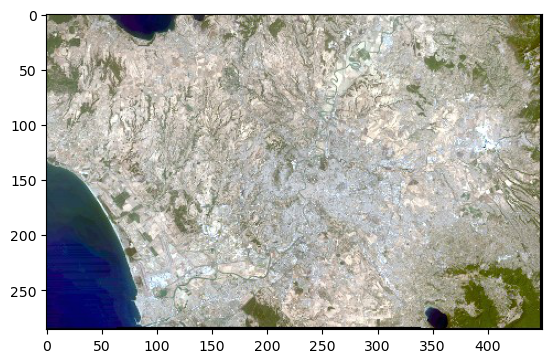

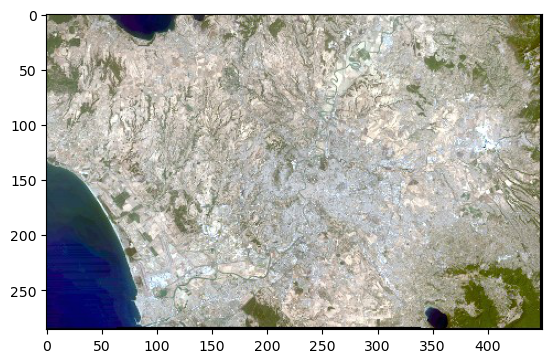

In [10]:
import io
from PIL import Image
import matplotlib.pyplot as plt

# Define product ids for a preview
# item_id = [item_ids[0], item_ids[1], item_ids[2]...]
selected_ids = [item_ids[0], item_ids[1]] if len(res.data.features) else []
if not len(selected_ids):
    print("No ids found.")

for sid in selected_ids:
    thumbnail = shcd.thumbnail(res.thumb, sid)
    image_bytes = io.BytesIO(thumbnail.content)
    image = Image.open(image_bytes)
    plt.imshow(image)
    plt.show()
    

# Data Order

### OPTIONAL: Getting compatible collections

In [8]:
collections = shcd.get_collection(res.query)
collections.print_info()

  idx  id                                    name                 created
-----  ------------------------------------  -------------------  ---------------------------
    0  1ee6350f-f296-492f-bba4-232bbd136855  New normal order 11  2022-11-03T10:20:22.597784Z
    1  d7b5f185-1c16-48c3-858b-7d5970056d65  New test order 2     2022-11-02T10:44:05.742428Z
    2  e34d15c4-99e8-4132-a353-11681af7dd02  My Airbus Spot data  2022-09-30T11:02:35.255790Z


#### Select collection id

In [ ]:
colIdx = -1 # Idx number from search above
collectionId = collections.data[colIdx]["id"]

### Query order: Airbus, Planet SkySat and Scope

In [ ]:
# Optional parametrs:
#  - collectionId
#
# example: shcd.order("Order name", Query, *Optional_parameters*)

# response = shcd.order("New query order", res.query)

### Normal order: Airbus, Planet SkySat and Scope

In [16]:
# Optional parametrs:
#  - collectionId
#
# example: shcd.order("Order name", Query, Items_Ids)
# example with collectionId: shcd.order("Order name", Query, Items_Ids, collectionId=collectionId)

print(res.query)
order = shcd.order("New normal order 12", res.query, item_ids=selected_ids)
order.print_info()

{'provider': 'AIRBUS', 'bounds': {'geometry': {'type': 'Polygon', 'coordinates': [[[12.500395, 41.931337], [12.507856, 41.931018], [12.507513, 41.927825], [12.50048, 41.928719], [12.500395, 41.931337]]]}}, 'data': [{'constellation': 'SPOT', 'dataFilter': {'maxCloudCoverage': 90, 'maxSnowCoverage': 50, 'timeRange': {'from': '2017-05-25T00:00:00Z', 'to': '2018-10-25T23:59:59Z'}}}]}
id                                    created                      name                 provider      sqkm  status
------------------------------------  ---------------------------  -------------------  ----------  ------  --------
b613156e-7432-4eae-9039-30cf38d8f1d8  2022-11-04T10:28:53.809035Z  New normal order 12  AIRBUS         2.5  CREATED


### Getting orders

In [12]:
# Optional: Get single order by adding order_id as parameter
# example: shcd.get_orders("asdf12-12bfa...")

orders = shcd.get_orders()
orders.print_info()

order_ids = orders.get_ids()


  idx  id                                    created                      name                 provider      sqkm  status
-----  ------------------------------------  ---------------------------  -------------------  ----------  ------  --------
    0  01b62ef0-bf1f-47f4-bd7a-17a73204fb72  2022-11-02T14:58:36.593130Z  New normal order 1   AIRBUS        2.5   CREATED
    1  03eb993a-7d1a-423a-accd-533f45d6db9b  2022-10-13T08:51:31.643479Z  airbus-sp            AIRBUS        2.5   DONE
    2  1751b1a7-9f8f-41a7-bbe9-745af4d61e60  2022-11-02T15:12:00.580023Z  New normal order 11  AIRBUS        2.5   DONE
    3  20f5290e-e815-46d6-88d6-8763d8470289  2022-10-20T08:23:57.267881Z  rr test2             AIRBUS        2.5   DONE
    4  30afa1fa-6fcb-4062-b4a9-5c82d9343bab  2022-11-02T08:33:38.146729Z  New normal order     AIRBUS        2.5   CREATED
    5  3135b353-4ec7-4cd7-a3f6-c8fbd20a829c  2022-10-25T07:29:39.704079Z  pleiades_7_km2       AIRBUS        7     DONE
    6  37107300-ad00-4219-b7

## Selecting an order

In [ ]:
order_id = order_ids[2] #you can use order_ids[1]

### Delete order

In [ ]:
res = shcd.delete_order(order_id)
res.print_info()

### Confirm order

In [ ]:
res = shcd.confirm_order(order_id)
res.print_info()